<a href="https://colab.research.google.com/github/jithendranaidupothala/datascienceproject-23030594/blob/main/datascienceproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df=pd.read_csv('/crop_production_main_dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15104 entries, 0 to 15103
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   State_Name       15104 non-null  object 
 1   District_Name    15104 non-null  object 
 2   Crop_Year        15104 non-null  int64  
 3   Season           15104 non-null  object 
 4   Crop             15104 non-null  object 
 5   Area             15104 non-null  float64
 6   Production       15082 non-null  float64
 7   Annual_Rainfall  15104 non-null  float64
 8   Fertilizer       15104 non-null  float64
 9   Pesticide        15104 non-null  float64
 10  Yield            15104 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.3+ MB


In [ ]:
#find null values
df.isnull().sum()

,0
State_Name,0
District_Name,0
Crop_Year,0
Season,0
Crop,0
Area,0
Production,22
Annual_Rainfall,0
Fertilizer,0
Pesticide,0


In [ ]:
df['Production'].fillna(df['Production'].mean(), inplace=True)

<ipython-input-16-477c3b18548b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Production'].fillna(df['Production'].mean(), inplace=True)


In [ ]:
df_filled = df.copy()
# Now apply filling methods to df_filled

In [ ]:
df.isna().sum()

,0
State_Name,0
District_Name,0
Crop_Year,0
Season,0
Crop,0
Area,0
Production,0
Annual_Rainfall,0
Fertilizer,0
Pesticide,0


In [ ]:
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.00,321.00,2051.4,7024878.38,22882.34,0.796087
1,Andaman and Nicobar Islands,NICOBARS,2001,Kharif,Rice,83.00,300.00,2051.4,631643.29,2057.47,0.710435
2,Andaman and Nicobar Islands,NICOBARS,2002,Kharif,Rice,189.20,510.84,2051.4,75755.32,246.76,0.238333
3,Andaman and Nicobar Islands,NICOBARS,2003,Kharif,Rice,52.00,90.17,2051.4,1870661.52,6093.36,5238.051739
4,Andaman and Nicobar Islands,NICOBARS,2004,Kharif,Rice,52.94,72.57,2051.4,165500.63,539.09,0.420909


<Axes: >

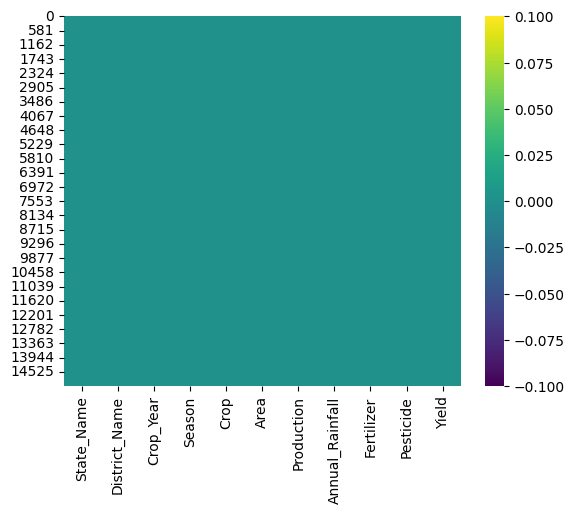

In [ ]:
sns.heatmap(df.isnull(), cmap='viridis')